Ridgeline plot to real-world cheese plot
=====================

Based on [this pots](https://twitter.com/ClausWilke/status/932764406693482497) by Claus Wilke and his shared code

Original code at https://gist.github.com/clauswilke/53643ebcae934a10b91a9b6909ee0c27

At first, in order to get the TWO plots at https://github.com/binder-examples/dockerfile-r to run at all, I had to uncomment two lines in each. Just results in ridgeline plots that way. HOWEVER==> SEE UPDATE BELOW THOUGH FOR "cheese plot" now!!

----

Ridgeline plot worked without the development tools/new version by removing the lines for "holes"
--------------

In [1]:
if(!require(DAAG)){install.packages("DAAG")}
if(!require(ggplot2)){install.packages("ggplot2")}
if(!require(ggridges)){install.packages("ggridges")}

Loading required package: DAAG
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘DAAG’”Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Loading required package: ggplot2
Loading required package: ggridges
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘ggridges’”Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Loading required package: lattice
Warning message:
“Ignoring unknown parameters: jittered_points, points_scaling_range”Picking joint bandwidth of 3.35


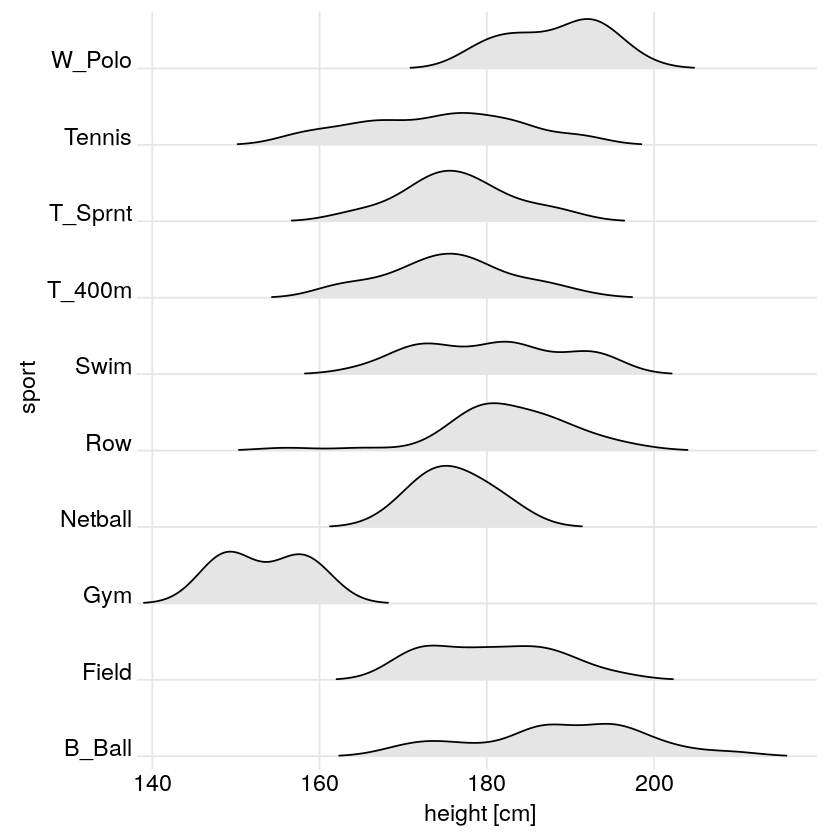

In [2]:
# original version
library(DAAG)
library(ggplot2)
library(ggridges)
ggplot(ais, aes(x=ht, y=sport, point_size=pcBfat, point_color=sex, group=sport)) +
  geom_density_ridges(jittered_points=TRUE, scale = .8, rel_min_height = .01, fill = "gray90",
                      points_scaling_range = c(.1, .8)) +
  scale_y_discrete(expand = c(.01, 0)) +
  scale_x_continuous(expand = c(0, 0), name = "height [cm]") +
  #scale_point_size_continuous(range = c(0.1, 5), name = "% bodyfat") +
  #scale_discrete_manual("point_color", values = c("#D55E00", "#0072B2"), labels = c("female", "male")) +
  guides(point_size = guide_legend(override.aes = list(fill = NA, color = NA)),
         point_color = guide_legend(override.aes = list(fill = NA, color = NA, point_size = 4))) +
  theme_ridges(center = TRUE)



Warning message:
“Ignoring unknown parameters: jittered_points, points_scaling_range”Picking joint bandwidth of 2.8


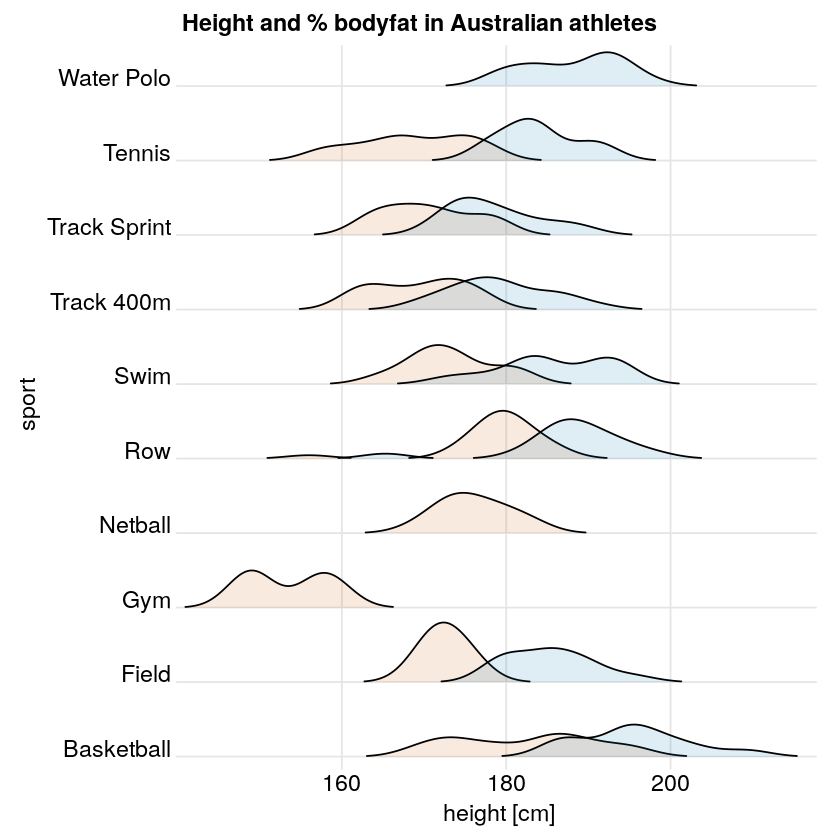

In [3]:
# improved version with renamed y labels and separate distributions for men and women
library(DAAG)
library(ggplot2)
library(ggridges)
ais$sport <- factor(ais$sport,
                    levels = c("B_Ball", "Field", "Gym", "Netball", "Row", "Swim", "T_400m", "T_Sprnt", "Tennis", "W_Polo"),
                    labels = c("Basketball", "Field", "Gym", "Netball", "Row", "Swim", "Track 400m", "Track Sprint", "Tennis", "Water Polo"))
ggplot(ais, aes(x=ht, y=sport, point_size=pcBfat, point_color=sex, fill=sex)) + 
  geom_density_ridges(jittered_points=TRUE, scale = .8, rel_min_height = .01,
                      points_scaling_range = c(.1, .8)) +
  scale_y_discrete(expand = c(.01, 0)) +
  scale_x_continuous(expand = c(0, 0), name = "height [cm]") +
  #scale_point_size_continuous(range = c(0.1, 5), name = "% bodyfat") +
  scale_fill_manual(values = c("#D55E0020", "#0072B220"), guide = "none") +
  #scale_discrete_manual("point_color", values = c("#D55E00", "#0072B2"), labels = c("female", "male")) +
  guides(point_size = guide_legend(override.aes = list(fill = NA, color = NA)),
         point_color = guide_legend(override.aes = list(fill = c("#D55E0020", "#0072B220"), color = NA, point_size = 4))) +
  ggtitle("Height and % bodyfat in Australian athletes") +
  theme_ridges(center = TRUE)

----

Real-World Cheese Plot working in a Binder
------------------

Trick was to get development tools/current version, see `if(!require(ggridges)){devtools::install_github("clauswilke/ggridges")}` line above and [this](https://twitter.com/ClausWilke/status/933087717126262784) and [this post](https://twitter.com/ClausWilke/status/933088361853739008).

----

In [7]:
if(!require(DAAG)){install.packages("DAAG")}
if(!require(ggplot2)){install.packages("ggplot2")}
if(!require(devtools)){install.packages("devtools")}
devtools::install_github("clauswilke/ggridges")
# line above where I modified the suggested line of 
# `if(!require(ggridges)){devtools::install_github("clauswilke/ggridges")}` so I could have ridgeline first
# and then cheese plots

from URL https://api.github.com/repos/clauswilke/ggridges/zipball/master
Installing ggridges
'/usr/local/lib/R/bin/R' --no-site-file --no-environ --no-save --no-restore  \
  --quiet CMD INSTALL  \
  '/tmp/Rtmpxcl2h2/devtoolsb577b27c6/clauswilke-ggridges-9fed630'  \
  --library='/usr/local/lib/R/site-library' --install-tests 

Reloading installed ggridges


Picking joint bandwidth of 3.35


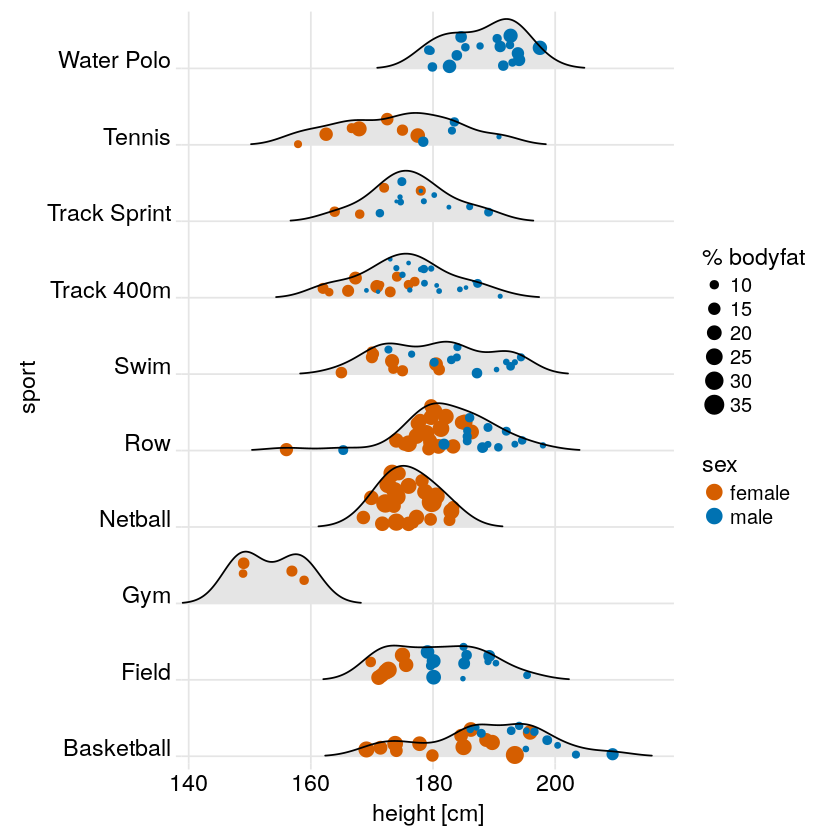

In [8]:
# original version
ggplot(ais, aes(x=ht, y=sport, point_size=pcBfat, point_color=sex, group=sport)) +
  geom_density_ridges(jittered_points=TRUE, scale = .8, rel_min_height = .01, fill = "gray90",
                      points_scaling_range = c(.1, .8)) +
  scale_y_discrete(expand = c(.01, 0)) +
  scale_x_continuous(expand = c(0, 0), name = "height [cm]") +
  scale_point_size_continuous(range = c(0.1, 5), name = "% bodyfat") +
  scale_discrete_manual("point_color", values = c("#D55E00", "#0072B2"), labels = c("female", "male")) +
  guides(point_size = guide_legend(override.aes = list(fill = NA, color = NA)),
         point_color = guide_legend(override.aes = list(fill = NA, color = NA, point_size = 4))) +
  theme_ridges(center = TRUE)

Picking joint bandwidth of 2.71


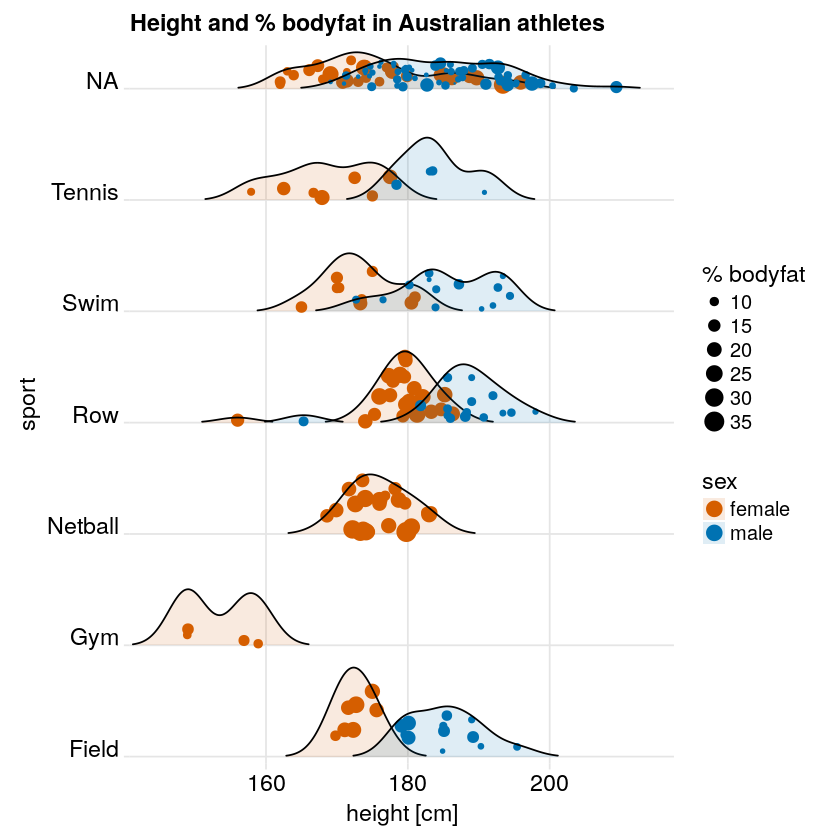

In [9]:
# improved version with renamed y labels and separate distributions for men and women
library(DAAG)
library(ggplot2)
library(ggridges)
ais$sport <- factor(ais$sport,
                    levels = c("B_Ball", "Field", "Gym", "Netball", "Row", "Swim", "T_400m", "T_Sprnt", "Tennis", "W_Polo"),
                    labels = c("Basketball", "Field", "Gym", "Netball", "Row", "Swim", "Track 400m", "Track Sprint", "Tennis", "Water Polo"))
ggplot(ais, aes(x=ht, y=sport, point_size=pcBfat, point_color=sex, fill=sex)) + 
  geom_density_ridges(jittered_points=TRUE, scale = .8, rel_min_height = .01,
                      points_scaling_range = c(.1, .8)) +
  scale_y_discrete(expand = c(.01, 0)) +
  scale_x_continuous(expand = c(0, 0), name = "height [cm]") +
  scale_point_size_continuous(range = c(0.1, 5), name = "% bodyfat") +
  scale_fill_manual(values = c("#D55E0020", "#0072B220"), guide = "none") +
  scale_discrete_manual("point_color", values = c("#D55E00", "#0072B2"), labels = c("female", "male")) +
  guides(point_size = guide_legend(override.aes = list(fill = NA, color = NA)),
         point_color = guide_legend(override.aes = list(fill = c("#D55E0020", "#0072B220"), color = NA, point_size = 4))) +
  ggtitle("Height and % bodyfat in Australian athletes") +
  theme_ridges(center = TRUE)